In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px



In [55]:
#df = pd.read_excel("Fatality.xlsx" , skiprows=2)
fatal = pd.read_excel("https://raw.githubusercontent.com/XJQiao/Rt_estimation/master/Fatality.xlsx",skiprows=2)
fatal = fatal.truncate(before=0, after=253)
fatal=fatal.drop(columns=['Sum', 'Avg'])
fatal

,County Name,Fatalities 2020-04-12,Fatalities 2020-04-13,Fatalities 2020-04-14,Fatalities 2020-04-15,Fatalities 2020-04-16,Fatalities 2020-04-17,Fatalities 2020-04-18,Fatalities 2020-04-19,Fatalities 2020-04-20,Fatalities 2020-04-21,Fatalities 2020-04-22,Fatalities 2020-04-23,Fatalities 2020-04-24,Fatalities 2020-04-25,Fatalities 2020-04-26,Fatalities 2020-04-27,Fatalities 2020-04-28,Fatalities 2020-04-29,Fatalities 2020-04-30,Fatalities 2020-05-01,Fatalities 2020-05-02,Fatalities 2020-05-03,Fatalities 2020-05-04,Fatalities 2020-05-05,Fatalities 2020-05-06,Fatalities 2020-05-07,Fatalities 2020-05-08,Fatalities 2020-05-09,Fatalities 2020-05-10,Fatalities 2020-05-11,Fatalities 2020-05-12,Fatalities 2020-05-13,Fatalities 2020-05-14,Fatalities 2020-05-15,Fatalities 2020-05-16,Fatalities 2020-05-17,Fatalities 2020-05-18,Fatalities 2020-05-19,Fatalities 2020-05-20,...,Fatalities 2020-08-18,Fatalities 2020-08-19,Fatalities 2020-08-20,Fatalities 2020-08-21,Fatalities 2020-08-22,Fatalities 2020-08-23,Fatalities 2020-08-24,Fatalities 2020-08-25,Fatalities 2020-08-26,Fatalities 2020-08-27,Fatalities 2020-08-28,Fatalities 2020-08-29,Fatalities 2020-08-30,Fatalities 2020-08-31,Fatalities 2020-09-01,Fatalities 2020-09-02,Fatalities 2020-09-03,Fatalities 2020-09-04,Fatalities 2020-09-05,Fatalities 2020-09-06,Fatalities 2020-09-07,Fatalities 2020-09-08,Fatalities 2020-09-09,Fatalities 2020-09-10,Fatalities 2020-09-11,Fatalities 2020-09-12,Fatalities 2020-09-13,Fatalities 2020-09-14,Fatalities 2020-09-15,Fatalities 2020-09-16,Fatalities 2020-09-17,Fatalities 2020-09-18,Fatalities 2020-09-19,Fatalities 2020-09-20,Fatalities 2020-09-21,Fatalities 2020-09-22,Fatalities 2020-09-23,Fatalities 2020-09-24,Fatalities 2020-09-25,Fatalities 2020-09-26
0,ANDERSON,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,22.0,22.0,23.0,24.0,24.0,24.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,28.0,29.0,29.0,30.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
1,ANDREWS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,ANGELINA,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,...,68.0,69.0,69.0,70.0,72.0,74.0,74.0,74.0,74.0,74.0,75.0,75.0,75.0,76.0,76.0,76.0,76.0,77.0,77.0,78.0,78.0,78.0,78.0,79.0,79.0,80.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,82.0,82.0,82.0,82.0,82.0,82.0
3,ARANSAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
4,ARCHER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,WOOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [3]:
hosp = pd.read_excel("https://raw.githubusercontent.com/XJQiao/Rt_estimation/master/Hospital%20(1).xlsx", sheet_name= 'COVID-19 Hospitalizations', skiprows=2)
hosp = hosp.truncate(before=0, after=21)
hosp

,TSA ID,TSA AREA,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,...,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
0,A.,Amarillo,17.0,17.0,17.0,40.0,18.0,24.0,18.0,35.0,17.0,17.0,41.0,41.0,40.0,46.0,59.0,64.0,67.0,82.0,84.0,87.0,91.0,101.0,94.0,90.0,96.0,109.0,112.0,109.0,103.0,98.0,94.0,82.0,84.0,79.0,80.0,72.0,68.0,70.0,...,60.0,55.0,57.0,58.0,56.0,61.0,59.0,55.0,51.0,49.0,51.0,49.0,47.0,47.0,46.0,48.0,51.0,54.0,55.0,56.0,57.0,54.0,53.0,47.0,44.0,42.0,46.0,68.0,72.0,70.0,71.0,62.0,63.0,63.0,63.0,74.0,74.0,73.0,79.0,84.0
1,B.,Lubbock,34.0,35.0,31.0,34.0,32.0,38.0,35.0,32.0,32.0,46.0,28.0,25.0,27.0,32.0,26.0,29.0,29.0,31.0,38.0,36.0,37.0,29.0,30.0,33.0,37.0,32.0,28.0,27.0,25.0,23.0,25.0,19.0,22.0,21.0,20.0,19.0,20.0,21.0,...,92.0,98.0,99.0,91.0,85.0,80.0,81.0,83.0,80.0,82.0,78.0,86.0,82.0,87.0,85.0,89.0,82.0,76.0,75.0,64.0,66.0,70.0,68.0,85.0,81.0,83.0,84.0,90.0,86.0,84.0,75.0,74.0,90.0,92.0,102.0,98.0,91.0,100.0,108.0,107.0
2,C.,Wichita Falls,5.0,5.0,6.0,4.0,5.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,45.0,47.0,46.0,47.0,45.0,35.0,41.0,26.0,23.0,24.0,27.0,21.0,24.0,22.0,29.0,28.0,29.0,25.0,24.0,26.0,29.0,26.0,33.0,34.0,29.0,31.0,28.0,27.0,31.0,31.0,36.0,39.0,29.0,26.0,24.0,25.0,25.0,25.0,26.0,30.0
3,D.,Abilene,6.0,7.0,2.0,6.0,5.0,8.0,3.0,10.0,6.0,7.0,11.0,9.0,9.0,6.0,6.0,7.0,6.0,4.0,4.0,4.0,4.0,6.0,4.0,5.0,3.0,3.0,2.0,1.0,3.0,5.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,...,36.0,30.0,34.0,33.0,39.0,23.0,40.0,29.0,27.0,27.0,23.0,26.0,27.0,29.0,30.0,36.0,37.0,31.0,30.0,23.0,26.0,25.0,28.0,30.0,27.0,27.0,29.0,30.0,29.0,31.0,32.0,31.0,28.0,15.0,19.0,23.0,23.0,21.0,15.0,17.0
4,E.,Dallas/Ft. Worth,369.0,365.0,373.0,449.0,470.0,476.0,428.0,435.0,410.0,443.0,477.0,517.0,550.0,521.0,472.0,491.0,583.0,611.0,576.0,636.0,635.0,530.0,513.0,674.0,679.0,669.0,676.0,650.0,569.0,530.0,678.0,627.0,666.0,680.0,685.0,551.0,553.0,646.0,...,1133.0,1075.0,1055.0,1039.0,1011.0,969.0,963.0,925.0,931.0,910.0,880.0,883.0,851.0,831.0,845.0,828.0,801.0,778.0,893.0,761.0,677.0,798.0,771.0,780.0,750.0,741.0,762.0,776.0,742.0,732.0,754.0,754.0,733.0,754.0,749.0,772.0,784.0,785.0,807.0,804.0
5,F.,Paris,14.0,16.0,21.0,18.0,15.0,12.0,12.0,17.0,16.0,19.0,19.0,17.0,19.0,17.0,17.0,19.0,18.0,14.0,16.0,18.0,19.0,17.0,16.0,16.0,13.0,16.0,16.0,12.0,14.0,16.0,16.0,14.0,11.0,13.0,15.0,14.0,14.0,12.0,...,112.0,105.0,107.0,111.0,108.0,76.0,110.0,78.0,76.0,72.0,72.0,69.0,67.0,64.0,74.0,77.0,77.0,72.0,74.0,74.0,69.0,71.0,71.0,81.0,82.0,70.0,74.0,78.0,69.0,69.0,67.0,64.0,67.0,66.0,85.0,90.0,85.0,85.0,94.0,91.0
6,G.,Longview/Tyler,32.0,26.0,33.0,32.0,36.0,43.0,36.0,42.0,45.0,47.0,60.0,43.0,48.0,47.0,54.0,53.0,54.0,53.0,53.0,63.0,68.0,96.0,67.0,54.0,57.0,53.0,50.0,55.0,49.0,46.0,43.0,39.0,40.0,45.0,40.0,37.0,41.0,40.0,...,234.0,233.0,221.0,211.0,203.0,202.0,196.0,206.0,192.0,198.0,199.0,204.0,206.0,213.0,222.0,220.0,220.0,218.0,201.0,185.0,194.0,200.0,180.0,174.0,188.0,172.0,172.0,168.0,169.0,170.0,177.0,164.0,159.0,157.0,151.0,159.0,153.0,159.0,168.0,158.0
7,H.,Lufkin,15.0,18.0,23.0,15.0,28.0,24.0,37.0,27.0,24.0,24.0,25.0,23.0,23.0,20.0,21.0,22.0,18.0,19.0,18.0,16.0,20.0,16.0,17.0,18.0,14.0,11.0,13.0,12.0,18.0,13.0,13.0,13.0,11.0,13.0,14.0,

In [4]:
fatal["County Name"]= fatal["County Name"].str.title() 
fatal = fatal.set_index('County Name')


In [5]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
datesh = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in hosp.keys()[2:]]   


In [6]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+')
fatal.columns=[pattern.findall(sub)[0] for sub in fatal.keys()]
fatal=fatal.T.copy()
fatal

County Name,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,Bastrop,Baylor,Bee,Bell,Bexar,Blanco,Borden,Bosque,Bowie,Brazoria,Brazos,Brewster,Briscoe,Brooks,Brown,Burleson,Burnet,Caldwell,Calhoun,Callahan,Cameron,Camp,Carson,Cass,Castro,Chambers,Cherokee,Childress,Clay,Cochran,...,Stephens,Sterling,Stonewall,Sutton,Swisher,Tarrant,Taylor,Terrell,Terry,Throckmorton,Titus,Tom Green,Travis,Trinity,Tyler,Upshur,Upton,Uvalde,Val Verde,Van Zandt,Victoria,Walker,Waller,Ward,Washington,Webb,Wharton,Wheeler,Wichita,Wilbarger,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
2020-04-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,31.0,0.0,0.0,0.0,5.0,5.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-04-13,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,32.0,0.0,0.0,0.0,5.0,5.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-04-14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,35.0,0.0,0.0,0.0,6.0,5.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,37.0,1.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,8.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-04-15,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,35.0,0.0,0.0,0.0,6.0,5.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40.0,2.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,11.0,0.0,0.0,1.0,0.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,36.0,0.0,0.0,0.0,6.0,5.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,45.0,2.0,0.0,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,11.0,0.0,0.0,1.0,0.0,2.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-22,31.0,9.0,82.0,18.0,1.0,1.0,30.0,9.0,5.0,8.0,29.0,1.0,33.0,84.0,1297.0,5.0,0.0,6.0,53.0,167.0,64.0,3.0,1.0,22.0,25.0,6.0,12.0,35.0,7.0,3.0,902.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,710.0,55.0,0.0,4.0,2.0,28.0,68.0,418.0,7.0,4.0,10.0,2.0,34.0,104.0,19.0,96.0,57.0,14.0,1.0,48.0,271.0,52.0,0.0,23.0,2.0,49.0,143.0,26.0,3.0,14.0,23.0,5.0,6.0,6.0,16.0
2020-09-23,31.0,9.0,82.0,18.0,1.0,1.0,30.0,9.0,5.0,8.0,29.0,1.0,33.0,84.0,1297.0,5.0,0.0,6.0,53.0,167.0,64.0,3.0,1.0,22.0,25.0,6.0,12.0,35.0,7.0,3.0,902.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,710.0,55.0,0.0,4.0,2.0,28.0,69.0,418.0,7.0,4.0,10.0,2.0,34.0,104.0,19.0,96.0,57.0,14.0,1.0,48.0,271.0,52.0,0.0,23.0,2.0,49.0,143.0,26.0,3.0,14.0,23.0,5.0,6.0,6.0,16.0
2020-09-24,31.0,9.0,82.0,18.0,1.0,1.0,30.0,9.0,5.0,8.0,29.0,1.0,33.0,84.0,1297.0,5.0,0.0,6.0,53.0,167.0,64.0,3.0,1.0,22.0,25.0,6.0,12.0,35.0,7.0,3.0,902.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.0,...,4.0,0.0,1.0,3.0,3.0,710.0,55.0,0.0,4.0,2.0,28.0,69.0,418.0,7.0,4.0,10.0,2.0,34.0,104.0,19.0,96.0,57.0,14.0,1.0,48.0,271.0,52.0,0.0,24.0,2.0,49.0,143.0,26.0,3.0,14.0,23.0,5.0,6.0,6.0,16.0
2020-09-25,31.0,9.0,82.0,18.0,1.0,1.0,30.0,9.0,5.0,8.0,29.0,1.0,33.0,84.0,1297.0,5.0,0.0,6.0,53.0,167.0,64.0,3.0,1.0,22.0,25.0,6.0,12.0,35.0,7.0,3.0,902.0,11.0,0.0,15.0,5.0,8.0,30.0,0.0,2.0,1.

In [7]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in hosp.keys()[2:]]  


In [8]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+')

hosp.drop(columns=['TSA ID','TSA AREA']).columns=[pattern.findall(sub)[0] for sub in hosp.keys()[2:]]


In [9]:
#Extracting TSA A County Data for merging all number of fatalities in for complete TSA 
TSA = [["Anderson", "Briscoe","Carson" ,"Childress" ,"Collingsworth" ,"Dallam","Deaf Smith","Donley","Gray","Hall","Hansford","Hartley","Hemphill",
         "Hutchinson","Lipscomb","Moore","Ochiltree","Oldham","Parmer","Potter","Randall","Roberts","Sherman","Swisher","Wheeler" ],
        ['Bailey','Borden','Castro','Cochran','Cottle','Crosby','Dawson','Dickens','Floyd','Gaines','Garza','Hale','Hockley','Kent','King',
         'Lamb','Lubbock','Lynn','Motley','Scurry','Terry','Yoakum'],
        ['Archer', 'Baylor','Clay','Foard','Hardeman','Jack','Montague','Wichita','Wilbarger','Young'],
        ['Brown', 'Callahan', 'Coleman', 'Comanche','Eastland', 'Fisher', 'Haskell', 'Jones', 'Knox', 'Mitchell', 'Nolan', 'Shackelford', 
         'Stephens', 'Stonewall', 'Taylor','Throckmorton'],
        ['Collin','Cooke','Dallas','Denton','Ellis','Erath','Fannin','Grayson','Hood','Hunt','Johnson','Kaufman','Navarro','Palo Pinto',
         'Parker','Rockwall','Somervell','Tarrant','Wise'],
        ['Bowie','Cass','Delta','Hopkins','Lamar','Morris','Red River','Titus'],
        ['Anderson', 'Camp','Cherokee','Franklin','Freestone','Gregg','Harrison','Henderson','Houston','Marion','Panola','Rains','Rusk', 
         'Shelby', 'Smith','Trinity','Upshur','Van Zandt','Wood'],
        ['Angelina','Nacogdoches','Polk','Sabine','San Augustine', 'San Jacinto', 'Tyler'],
        ['Culberson','El Paso', 'Hudspeth'],
        ['Andrews','Brewster','Crane','Ector','Glasscock','Howard','Jeff Davis','Loving','Martin','Midland','Pecos','Presidio','Reeves',
         'Terrell','Upton','Ward','Winkler'],
        ['Coke','Concho','Crockett','Irion','Kimble','Mason','Mcculloch','Menard','Reagan','Runnels','Schleicher','Sterling','Sutton',
         'Tom Green'],
        ['Bell','Coryell','Hamilton','Lampasas','Milam','Mills'],
        ['Bosque','Falls','Hill','Limestone','Mclennan'],
        ['Brazos','Burleson','Grimes','Leon','Madison','Robertson','Washington'],
        ['Bastrop','Blanco','Burnet','Caldwell','Fayette','Hays','Lee','Llano','San Saba','Travis','Williamson'],
        ['Atascosa','Bandera','Bexar','Comal','Dimmit','Edwards','Frio','Gillespie','Gonzales','Guadalupe','Karnes','Kendall','Kerr',
         'Kinney','La Salle','Maverick','Medina','Real','Uvalde','Val Verde','Wilson','Zavala'],
        ['Austin','Colorado','Fort Bend','Harris','Matagorda','Montgomery','Walker','Waller','Wharton'],
        ['Brazoria','Chambers','Galveston','Hardin','Jasper','Jefferson','Liberty','Newton','Orange'],
        ['Calhoun','De Witt','Goliad','Jackson','Lavaca','Victoria'],
        ['Jim Hogg','Webb','Zapata'],
        ['Aransas','Bee','Brooks','Duval','Jim Wells','Kenedy', 'Kleberg', 'Live Oak', 'Mcmullen','Nueces','Refugio','San Patricio'],
        ['Cameron','Hidalgo','Starr','Willacy']]

In [49]:
#Getting Total Number of Fatalities for the TSA
fatalR=[fatal[region].sum(axis=1) for pos, region in enumerate(TSA)]  # Sum counties to health region


FRS=[]
for FR in fatalR:
  FRS.append(FR.diff().sum())

FRM=np.divide(FRS, len(fatal))
FRM

array([ 1.26785714,  1.51785714,  0.25      ,  0.70238095, 14.52380952,
        0.89285714,  2.63095238,  1.16666667,  3.11904762,  1.20833333,
        0.61904762,  0.6547619 ,  0.80952381,  0.89285714,  4.2797619 ,
       11.4047619 , 18.44642857,  3.54166667,  1.16666667,  1.61904762,
        3.80357143, 15.52380952])

In [51]:
HS=hosp.sum(axis=1)
HM=np.divide(HS,len(hosp.keys()[2:]))


0       53.523810
1       66.809524
2       18.648810
3       20.303571
4      978.803571
5       54.345238
6      129.809524
7       44.285714
8      144.714286
9       51.505952
10      20.660714
11      39.773810
12      30.928571
13      31.827381
14     202.279762
15     500.214286
16    1135.309524
17     206.107143
18      65.928571
19      87.208333
20     149.166667
21     503.404762
dtype: float64

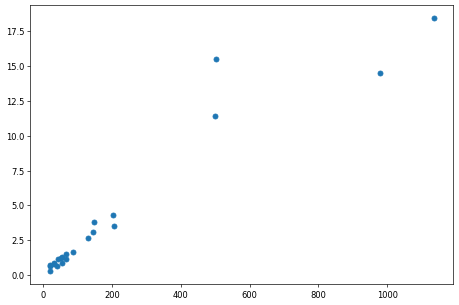

In [54]:
fig = plt.figure(figsize=(20,80), dpi=60)
ax1 = fig.add_subplot(11,2,1)
ax1.scatter(HM, FRM)

In [ ]:
#Ploting for TSA 1
fig = plt.figure(figsize=(20,80), dpi=60)
ax1 = fig.add_subplot(11,2,1)
ax1.title.set_text('TSA A Comparison')
ax1.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA1.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='red')
plt.plot(datesh,df2.T['Amarillo'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax1.legend()

ax2=plt.gca()
ax2 = fig.add_subplot(11,2,2)
ax2.title.set_text('TSA B Comparison')
ax2.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA2.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='red')
plt.plot(datesh,df2.T['Lubbock'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax2.legend()

ax3=plt.gca()
ax3 = fig.add_subplot(11,2,3)
ax3.title.set_text('TSA C Comparison')
ax3.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA3.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='red')
plt.plot(datesh,df2.T['Wichita Falls'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax3.legend()

ax4=plt.gca()
ax4 = fig.add_subplot(11,2,4)
ax4.title.set_text('TSA D Comparison')
ax4.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA4.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='red')
plt.plot(datesh,df2.T['Abilene'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax4.legend()

ax5=plt.gca()
ax5 = fig.add_subplot(11,2,5)
ax5.title.set_text('TSA E Comparison')
ax5.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax5.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA5.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='red')
plt.plot(datesh,df2.T['Dallas/Ft. Worth'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax5.legend()

ax6=plt.gca()
ax6 = fig.add_subplot(11,2,6)
ax6.title.set_text('TSA F Comparison')
ax6.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax6.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA6.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='red')
plt.plot(datesh,df2.T['Paris'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax6.legend()

ax7=plt.gca()
ax7 = fig.add_subplot(11,2,7)
ax7.title.set_text('TSA G Comparison')
ax7.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax7.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA7.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='red')
plt.plot(datesh,df2.T['Longview/Tyler'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax7.legend()

ax8=plt.gca()
ax8 = fig.add_subplot(11,2,8)
ax8.title.set_text('TSA H Comparison')
ax8.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax8.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA8.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='red')
plt.plot(datesh,df2.T['Lufkin'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax8.legend()

ax9=plt.gca()
ax9 = fig.add_subplot(11,2,9)
ax9.title.set_text('TSA I Comparison')
ax9.set_yscale('log', basey=10)
#ax.set_ylim(0,10)
ax9.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA9.T['Total'].diff().rolling(window=14).mean(), label="Fatality", color='red')
plt.plot(datesh,df2.T['El Paso'].rolling(window=14).mean(), label="Hospitalization", color = 'blue')
ax9.legend()


